In [0]:
import sys
print(sys.path)

['/databricks/python_shell/scripts', '/local_disk0/spark-641fa65d-b592-415e-af5c-f67a6ee934bf/userFiles-7bffe1f0-3ee6-4029-95f7-3b572beb71f0', '/databricks/spark/python', '/databricks/spark/python/lib/py4j-0.10.9.5-src.zip', '/databricks/jars/spark--driver--driver-spark_3.3_2.12_deploy.jar', '/WSFS_NOTEBOOK_DIR', '/databricks/python_shell', '/usr/lib/python39.zip', '/usr/lib/python3.9', '/usr/lib/python3.9/lib-dynload', '', '/local_disk0/.ephemeral_nfs/envs/pythonEnv-c5a86d07-b114-47be-852d-7f48c49be2b2/lib/python3.9/site-packages', '/local_disk0/.ephemeral_nfs/cluster_libraries/python/lib/python3.9/site-packages', '/databricks/python/lib/python3.9/site-packages', '/usr/local/lib/python3.9/dist-packages', '/usr/lib/python3/dist-packages']


In [0]:
import os 
print(os.environ['SPARK_HOME'])
print(os.environ['JAVA_HOME'])

print(os.environ['PATH'])
os.environ["pyspark_python"] = "/anconda3/envs/ucBEXtension/bin/python"

/databricks/spark
/usr/lib/jvm/zulu8-ca-amd64/jre/
/local_disk0/.ephemeral_nfs/envs/pythonEnv-c5a86d07-b114-47be-852d-7f48c49be2b2/bin:/local_disk0/.ephemeral_nfs/cluster_libraries/python/bin:/databricks/.pyenv/bin:/usr/local/nvidia/bin:/databricks/python3/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/snap/bin


In [0]:
pip install findspark

Python interpreter will be restarted.
Python interpreter will be restarted.


In [0]:
import findspark
findspark.init()

In [0]:
import pyspark
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession, types
from pyspark.sql import Row
from pyspark.sql import SQLContext

In [0]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("KafkaSparkIntegration") \
    .config("spark.driver.cores", "1") \
    .config("spark.driver.memory", "1g") \
    .config("spark.executor.cores", "2") \
    .config("spark.executor.memory", "1gb") \
    .config("spark.num.executors", "2") \
    .enableHiveSupport() \
    .getOrCreate()

sc = spark.sparkContext

In [0]:
spark.sparkContext.getConf().getAll()

Out[4]: [('spark.databricks.preemption.enabled', 'true'),
 ('spark.sql.hive.metastore.jars', '/databricks/databricks-hive/*'),
 ('spark.driver.tempDirectory', '/local_disk0/tmp'),
 ('spark.sql.warehouse.dir', 'dbfs:/user/hive/warehouse'),
 ('spark.databricks.managedCatalog.clientClassName',
  'com.databricks.managedcatalog.ManagedCatalogClientImpl'),
 ('spark.databricks.credential.scope.fs.gs.auth.access.tokenProviderClassName',
  'com.databricks.backend.daemon.driver.credentials.CredentialScopeGCPTokenProvider'),
 ('spark.hadoop.fs.fcfs-s3.impl.disable.cache', 'true'),
 ('spark.sql.streaming.checkpointFileManagerClass',
  'com.databricks.spark.sql.streaming.DatabricksCheckpointFileManager'),
 ('spark.databricks.service.dbutils.repl.backend',
  'com.databricks.dbconnect.ReplDBUtils'),
 ('spark.hadoop.databricks.s3.verifyBucketExists.enabled', 'false'),
 ('spark.streaming.driver.writeAheadLog.allowBatching', 'true'),
 ('spark.databricks.clusterSource', 'UI'),
 ('spark.hadoop.hive.server

In [0]:
sqlcontext = SQLContext(sc)

/databricks/spark/python/pyspark/sql/context.py:117: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [0]:
data = spark.read.format("csv") \
    .option("header","true") \
    .option("inferschema","true") \
    .load("/FileStore/tables/train-4.csv")        

In [0]:
display(data)

ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
462643,Female,Yes,38,Yes,Engineer,null,Average,3.0,Cat_4,A
466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
462669,Female,Yes,40,Yes,Entertainment,null,High,6.0,Cat_6,A
461319,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C
460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,C
464347,Female,No,33,Yes,Healthcare,1.0,Low,3.0,Cat_6,D
465015,Female,Yes,61,Yes,Engineer,0.0,Low,3.0,Cat_7,D
465176,Female,Yes,55,Yes,Artist,1.0,Average,4.0,Cat_6,C


In [0]:
type(data)

Out[25]: pyspark.sql.dataframe.DataFrame

In [0]:
data.collect()

Out[26]: [Row(ID=462809, Gender='Male', Ever_Married='No', Age=22, Graduated='No', Profession='Healthcare', Work_Experience=1.0, Spending_Score='Low', Family_Size=4.0, Var_1='Cat_4', Segmentation='D'),
 Row(ID=462643, Gender='Female', Ever_Married='Yes', Age=38, Graduated='Yes', Profession='Engineer', Work_Experience=None, Spending_Score='Average', Family_Size=3.0, Var_1='Cat_4', Segmentation='A'),
 Row(ID=466315, Gender='Female', Ever_Married='Yes', Age=67, Graduated='Yes', Profession='Engineer', Work_Experience=1.0, Spending_Score='Low', Family_Size=1.0, Var_1='Cat_6', Segmentation='B'),
 Row(ID=461735, Gender='Male', Ever_Married='Yes', Age=67, Graduated='Yes', Profession='Lawyer', Work_Experience=0.0, Spending_Score='High', Family_Size=2.0, Var_1='Cat_6', Segmentation='B'),
 Row(ID=462669, Gender='Female', Ever_Married='Yes', Age=40, Graduated='Yes', Profession='Entertainment', Work_Experience=None, Spending_Score='High', Family_Size=6.0, Var_1='Cat_6', Segmentation='A'),
 Row(ID=4

In [0]:
from pyspark.sql.types import StructType, StructField, StringType

schema = StructType([
    StructField('ID', StringType(), True),
    StructField('Gender', StringType(), True),
    StructField('Ever_Married', StringType(), True),
    StructField('Age', StringType(), True),
    StructField('Graduated', StringType(), True),
    StructField('Profession', StringType(), True),
    StructField('Work_Experience', StringType(), True),
    StructField('Spending_score', StringType(), True),
    StructField('Family_Size', StringType(), True),
    StructField('Var_1', StringType(), True),
    StructField('Segmentation', StringType(), True)
])

In [0]:
from pyspark.sql.types import IntegerType
data = (data.withColumn("Age", data["Age"].cast(IntegerType()))
           .withColumn("ID", data["ID"].cast(IntegerType()))
           .withColumn("Work_Experience", data["Work_Experience"].cast(IntegerType()))
           .withColumn("Family_Size", data["Family_Size"].cast(IntegerType())))

In [0]:
data.show()

+------+------+------------+---+---------+-------------+---------------+--------------+-----------+-----+------------+
|    ID|Gender|Ever_Married|Age|Graduated|   Profession|Work_Experience|Spending_Score|Family_Size|Var_1|Segmentation|
+------+------+------------+---+---------+-------------+---------------+--------------+-----------+-----+------------+
|462809|  Male|          No| 22|       No|   Healthcare|              1|           Low|          4|Cat_4|           D|
|462643|Female|         Yes| 38|      Yes|     Engineer|           null|       Average|          3|Cat_4|           A|
|466315|Female|         Yes| 67|      Yes|     Engineer|              1|           Low|          1|Cat_6|           B|
|461735|  Male|         Yes| 67|      Yes|       Lawyer|              0|          High|          2|Cat_6|           B|
|462669|Female|         Yes| 40|      Yes|Entertainment|           null|          High|          6|Cat_6|           A|
|461319|  Male|         Yes| 56|       No|      

In [0]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
data.head(10)

Out[34]: [Row(ID=462809, Gender='Male', Ever_Married='No', Age=22, Graduated='No', Profession='Healthcare', Work_Experience=1, Spending_Score='Low', Family_Size=4, Var_1='Cat_4', Segmentation='D'),
 Row(ID=462643, Gender='Female', Ever_Married='Yes', Age=38, Graduated='Yes', Profession='Engineer', Work_Experience=None, Spending_Score='Average', Family_Size=3, Var_1='Cat_4', Segmentation='A'),
 Row(ID=466315, Gender='Female', Ever_Married='Yes', Age=67, Graduated='Yes', Profession='Engineer', Work_Experience=1, Spending_Score='Low', Family_Size=1, Var_1='Cat_6', Segmentation='B'),
 Row(ID=461735, Gender='Male', Ever_Married='Yes', Age=67, Graduated='Yes', Profession='Lawyer', Work_Experience=0, Spending_Score='High', Family_Size=2, Var_1='Cat_6', Segmentation='B'),
 Row(ID=462669, Gender='Female', Ever_Married='Yes', Age=40, Graduated='Yes', Profession='Entertainment', Work_Experience=None, Spending_Score='High', Family_Size=6, Var_1='Cat_6', Segmentation='A'),
 Row(ID=461319, Gender='M

In [0]:
data.count()

Out[36]: 8068

In [0]:
type(data)

Out[38]: pyspark.sql.dataframe.DataFrame

In [0]:
data.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Ever_Married: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Graduated: string (nullable = true)
 |-- Profession: string (nullable = true)
 |-- Work_Experience: integer (nullable = true)
 |-- Spending_Score: string (nullable = true)
 |-- Family_Size: integer (nullable = true)
 |-- Var_1: string (nullable = true)
 |-- Segmentation: string (nullable = true)



In [0]:
data.columns

Out[41]: ['ID',
 'Gender',
 'Ever_Married',
 'Age',
 'Graduated',
 'Profession',
 'Work_Experience',
 'Spending_Score',
 'Family_Size',
 'Var_1',
 'Segmentation']

In [0]:
unique_values = data.select("Profession").distinct()
unique_values.show()


+-------------+
|   Profession|
+-------------+
|Entertainment|
|   Healthcare|
|       Lawyer|
|         null|
|    Homemaker|
|    Executive|
|       Artist|
|    Marketing|
|       Doctor|
|     Engineer|
+-------------+



In [0]:
unique_values = data.select("Var_1").distinct()
unique_values.show()


+-----+
|Var_1|
+-----+
|Cat_3|
|Cat_5|
|Cat_1|
| null|
|Cat_7|
|Cat_6|
|Cat_4|
|Cat_2|
+-----+



In [0]:
unique_values = data.select("Spending_Score").distinct()
unique_values.show()

+--------------+
|Spending_Score|
+--------------+
|          High|
|           Low|
|       Average|
+--------------+



In [0]:
unique_values = data.select("Segmentation").distinct()
unique_values.show()

+------------+
|Segmentation|
+------------+
|           B|
|           D|
|           C|
|           A|
+------------+



In [0]:
data.describe()

Out[48]: DataFrame[summary: string, ID: string, Gender: string, Ever_Married: string, Age: string, Graduated: string, Profession: string, Work_Experience: string, Spending_Score: string, Family_Size: string, Var_1: string, Segmentation: string]

In [0]:
data.summary().show()

+-------+------------------+------+------------+-----------------+---------+----------+------------------+--------------+------------------+-----+------------+
|summary|                ID|Gender|Ever_Married|              Age|Graduated|Profession|   Work_Experience|Spending_Score|       Family_Size|Var_1|Segmentation|
+-------+------------------+------+------------+-----------------+---------+----------+------------------+--------------+------------------+-----+------------+
|  count|              8068|  8068|        7928|             8068|     7990|      7944|              7239|          8068|              7733| 7992|        8068|
|   mean|463479.21455131384|  null|        null|43.46690629647992|     null|      null| 2.641663213150988|          null|  2.85012285012285| null|        null|
| stddev|2595.3812317547004|  null|        null|16.71169631872117|     null|      null|3.4067629854580828|          null|1.5314132820253776| null|        null|
|    min|            458982|Female|     

In [0]:
from pyspark.sql.functions import col,isnan, when, count
data.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in data.columns]
   ).show()

+---+------+------------+---+---------+----------+---------------+--------------+-----------+-----+------------+
| ID|Gender|Ever_Married|Age|Graduated|Profession|Work_Experience|Spending_Score|Family_Size|Var_1|Segmentation|
+---+------+------------+---+---------+----------+---------------+--------------+-----------+-----+------------+
|  0|     0|         140|  0|       78|       124|            829|             0|        335|   76|           0|
+---+------+------------+---+---------+----------+---------------+--------------+-----------+-----+------------+



In [0]:
from pyspark.sql.functions import col, desc, first

def approx_mode(column):
    return data.groupBy(column).count().orderBy(desc("count")).first()[column]

columns_to_fill = ["Ever_Married", "Graduated", "Profession","Var_1"]
for column in columns_to_fill:
    approx_mode_value = approx_mode(column)
    data = data.fillna(approx_mode_value, subset=[column])

    




In [0]:
columns_to_fill = ["Work_Experience", "Family_Size"]
for column in columns_to_fill:
    median_value = data.approxQuantile(column, [0.5], 0.01)[0]
    data = data.fillna(median_value, subset=[column])



In [0]:
from pyspark.sql.functions import col,isnan, when, count
data.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in data.columns]
   ).show()

+---+------+------------+---+---------+----------+---------------+--------------+-----------+-----+------------+
| ID|Gender|Ever_Married|Age|Graduated|Profession|Work_Experience|Spending_Score|Family_Size|Var_1|Segmentation|
+---+------+------------+---+---------+----------+---------------+--------------+-----------+-----+------------+
|  0|     0|           0|  0|        0|         0|              0|             0|          0|    0|           0|
+---+------+------------+---+---------+----------+---------------+--------------+-----------+-----+------------+



In [0]:
pandas_df = data.toPandas()
    



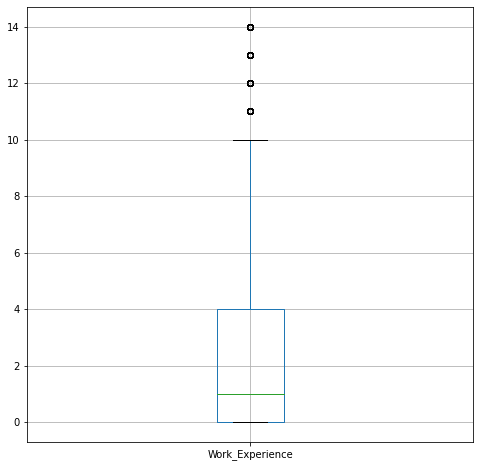

In [0]:
plt.figure(figsize=(8,8))
pandas_df.boxplot(column="Work_Experience")
plt.show()

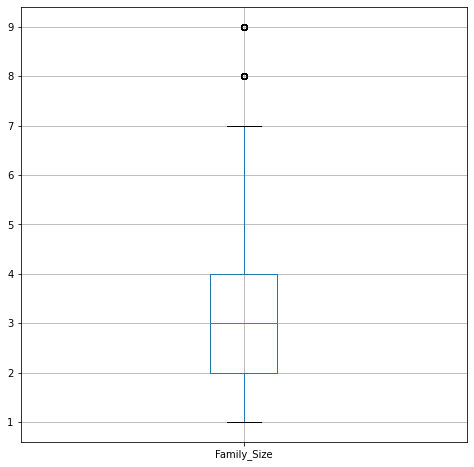

In [0]:
plt.figure(figsize=(8,8))
pandas_df.boxplot(column="Family_Size")
plt.show()

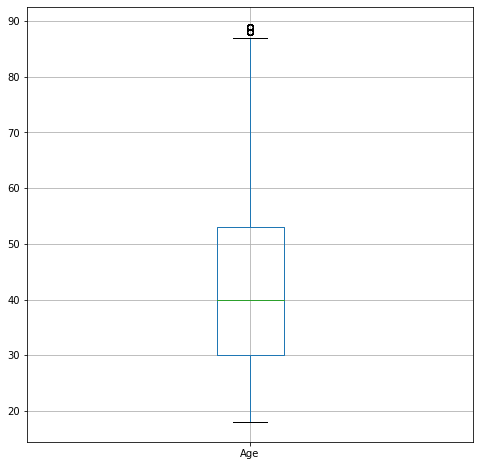

In [0]:
plt.figure(figsize=(8,8))
pandas_df.boxplot(column="Age")
plt.show()

In [0]:
min_val=(pandas_df['Work_Experience'].mean()) - (3* pandas_df['Work_Experience'].std())
print(min_val)

-7.322764895256634


In [0]:
max_val=(pandas_df['Work_Experience'].mean())+(3*pandas_df['Work_Experience'].std())
print(max_val)

12.26872424081935


In [0]:
work_experience_unique = data.select("Work_Experience").distinct()
work_experience_unique.show()

+---------------+
|Work_Experience|
+---------------+
|             12|
|              1|
|             13|
|              6|
|              3|
|              5|
|              9|
|              4|
|              8|
|              7|
|             10|
|             11|
|             14|
|              2|
|              0|
+---------------+



In [0]:
min_val=(pandas_df['Family_Size'].mean()) - (3* pandas_df['Family_Size'].std())
print(min_val)

-1.6423837835387975


In [0]:
max_val=(pandas_df['Family_Size'].mean()) + (3* pandas_df['Family_Size'].std())
print(max_val)

7.355075900544252


In [0]:
family_size_unique = data.select("Family_Size").distinct()
family_size_unique.show()

+-----------+
|Family_Size|
+-----------+
|          1|
|          6|
|          3|
|          5|
|          9|
|          4|
|          8|
|          7|
|          2|
+-----------+



In [0]:
min_val=(pandas_df['Age'].mean()) - (3* pandas_df['Age'].std())
print(min_val)

-6.668182659683552


In [0]:
max_val=(pandas_df['Age'].mean()) + (3* pandas_df['Age'].std())
print(max_val)

93.60199525264339


In [0]:
age_unique = data.select("Age").distinct()
age_unique.show()

+---+
|Age|
+---+
| 31|
| 26|
| 22|
| 40|
| 19|
| 41|
| 61|
| 35|
| 55|
| 49|
| 45|
| 38|
| 70|
| 32|
| 56|
| 58|
| 33|
| 79|
| 67|
| 18|
+---+
only showing top 20 rows



In [0]:
def plot_boxplot(df,ft):
    pandas_df.boxplot(columns=[ft])
    plt.show()

In [0]:
    from pyspark.sql.functions import col, expr
    def outliers (df,ft):
        q1=df[ft].quantile(0.25)
        q3=df[ft].quantile(0.75)
        IQR=q3-q1
        lower_fence=q1-1.5*IQR
        upper_fence=q3+1.5*IQR
        ls=df.index[(df[ft] < lower_fence) | (df[ft] > upper_fence) ]
        return(ls)
        

    


In [0]:
index_list=[]
for feature in ['Work_Experience','Family_Size','Age']:
    index_list.extend(outliers(pandas_df,feature))
#index_list

In [0]:
def remove (df,ls):
    ls=sorted(set(ls))
    df=df.drop(ls)
    return(df)

In [0]:
outliers(pandas_df,'Work_Experience')

Out[89]: Int64Index([  20,   22,   42,   55,  176,  257,  321,  338,  367,  391,
            ...
            7586, 7663, 7726, 7798, 7808, 7835, 7870, 7990, 8028, 8043],
           dtype='int64', length=189)

In [0]:
df_cleaned=remove(pandas_df,index_list)

In [0]:
df_cleaned.count()

Out[91]: ID                 7720
Gender             7720
Ever_Married       7720
Age                7720
Graduated          7720
Profession         7720
Work_Experience    7720
Spending_Score     7720
Family_Size        7720
Var_1              7720
Segmentation       7720
dtype: int64

In [0]:
 df_cleaned.rename(columns={"Ever_Married":"marital status","Profession":"career"},inplace=True)

In [0]:
df_cleaned.corr

Out[93]: <bound method DataFrame.corr of           ID  Gender marital status  Age Graduated         career  \
0     462809    Male             No   22        No     Healthcare   
1     462643  Female            Yes   38       Yes       Engineer   
2     466315  Female            Yes   67       Yes       Engineer   
3     461735    Male            Yes   67       Yes         Lawyer   
4     462669  Female            Yes   40       Yes  Entertainment   
...      ...     ...            ...  ...       ...            ...   
8063  464018    Male             No   22        No         Artist   
8064  464685    Male             No   35        No      Executive   
8065  465406  Female             No   33       Yes     Healthcare   
8066  467299  Female             No   27       Yes     Healthcare   
8067  461879    Male            Yes   37       Yes      Executive   

      Work_Experience Spending_Score  Family_Size  Var_1 Segmentation  
0                   1            Low            4  Cat_4  

Out[94]: <AxesSubplot:>

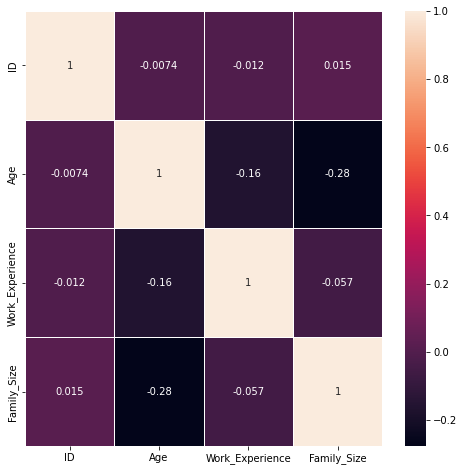

In [0]:
plt.figure(figsize=(8,8))
sns.heatmap(df_cleaned.corr(),annot=True,linewidths=.5)

Out[95]: <seaborn.axisgrid.FacetGrid at 0x7f6287e10190>

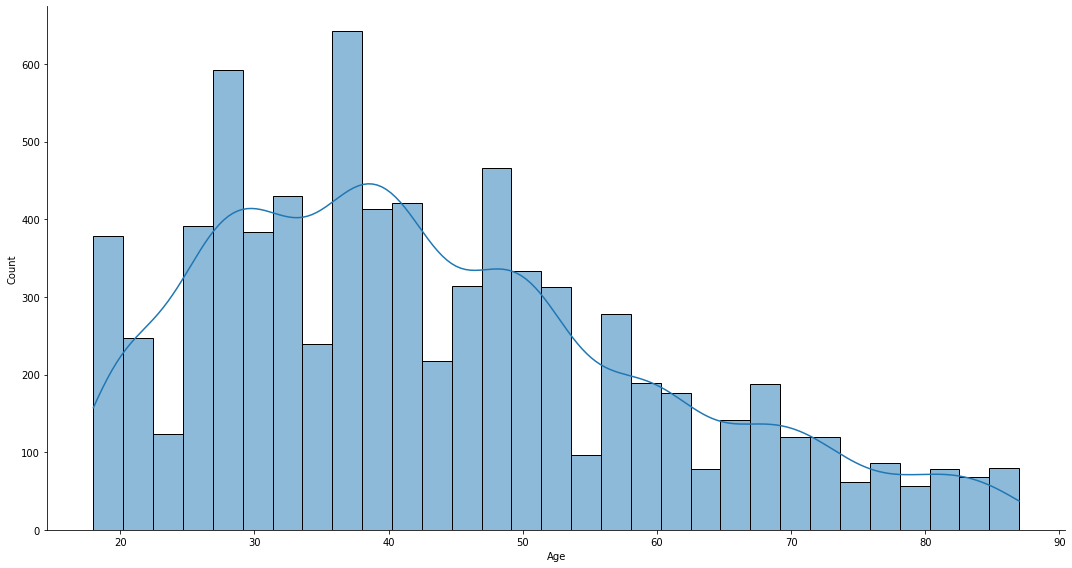

In [0]:
sns.displot(data=df_cleaned,x='Age',kde=True,height=8,aspect=15/8)

In [0]:
df_cleaned.groupby(by=['Age','Gender']).count()

ID 
 marital status 
 Graduated 
 career 
 Work_Experience 
 Spending_Score 
 Family_Size 
 Var_1 
 Segmentation 
 
 
 Age 
 Gender 
 
 
 
 
 
 
 
 
 
 
 
 
 
 18 
 Female 
 45 
 45 
 45 
 45 
 45 
 45 
 45 
 45 
 45 
 
 
 Male 
 81 
 81 
 81 
 81 
 81 
 81 
 81 
 81 
 81 
 
 
 19 
 Female 
 42 
 42 
 42 
 42 
 42 
 42 
 42 
 42 
 42 
 
 
 Male 
 86 
 86 
 86 
 86 
 86 
 86 
 86 
 86 
 86 
 
 
 20 
 Female 
 52 
 52 
 52 
 52 
 52 
 52 
 52 
 52 
 52 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 85 
 Male 
 13 
 13 
 13 
 13 
 13 
 13 
 13 
 13 
 13 
 
 
 86 
 Female 
 17 
 17 
 17 
 17 
 17 
 17 
 17 
 17 
 17 
 
 
 Male 
 12 
 12 
 12 
 12 
 12 
 12 
 12 
 12 
 12 
 
 
 87 
 Female 
 14 
 14 
 14 
 14 
 14 
 14 
 14 
 14 
 14 
 
 
 Male 
 14 
 14 
 14 
 14 
 14 
 14 
 14 
 14 
 14 
 
 
 
 130 rows × 9 columns

In [0]:
bins=[18,21,31,41,51,61,71,81,89]
labels=['18-20','21-30','31-40','41-50','51-60','61-70','71-80','81-89']
df_cleaned['Age_group']=pd.cut(df_cleaned['Age'],bins=bins,labels=labels)
df_cleaned

,ID,Gender,marital status,Age,Graduated,career,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Age_group
0,462809,Male,No,22,No,Healthcare,1,Low,4,Cat_4,D,21-30
1,462643,Female,Yes,38,Yes,Engineer,1,Average,3,Cat_4,A,31-40
2,466315,Female,Yes,67,Yes,Engineer,1,Low,1,Cat_6,B,61-70
3,461735,Male,Yes,67,Yes,Lawyer,0,High,2,Cat_6,B,61-70
4,462669,Female,Yes,40,Yes,Entertainment,1,High,6,Cat_6,A,31-40
...,...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,Artist,0,Low,7,Cat_1,D,21-30
8064,464685,Male,No,35,No,Executive,3,Low,4,Cat_4,D,31-40
8065,465406,Female,No,33,Yes,Healthcare,1,Low,1,Cat_6,D,31-40
8066,467299,Female,No,27,Yes,Healthcare,1,Low,4,Cat_6,B,21-30


Out[98]: <AxesSubplot:title={'center':'customer age'}, xlabel='Age_group', ylabel='count'>

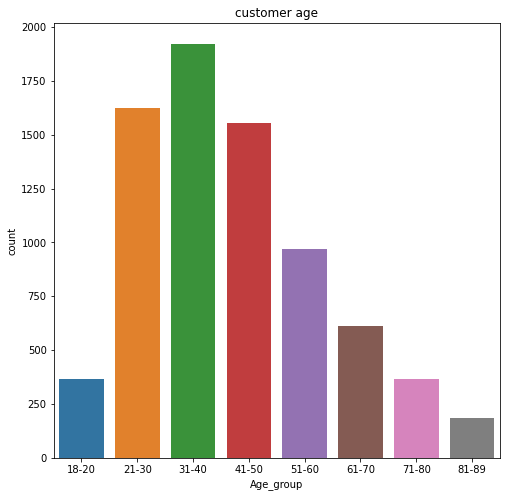

In [0]:
plt.figure(figsize=(8,8))
plt.title('customer age')
plt.xlabel('Age_group')
sns.countplot(x='Age_group',data=df_cleaned)

In [0]:
df_cleaned.pivot_table(index='Age_group',columns='Gender',values='Segmentation',aggfunc='count')

Gender,Female,Male
Age_group,,
18-20,140,225
21-30,770,855
31-40,939,983
41-50,740,814
51-60,369,599
61-70,239,372
71-80,157,209
81-89,79,104


Out[100]: <AxesSubplot:title={'center':'gender with age'}, xlabel='Age_group', ylabel='count'>

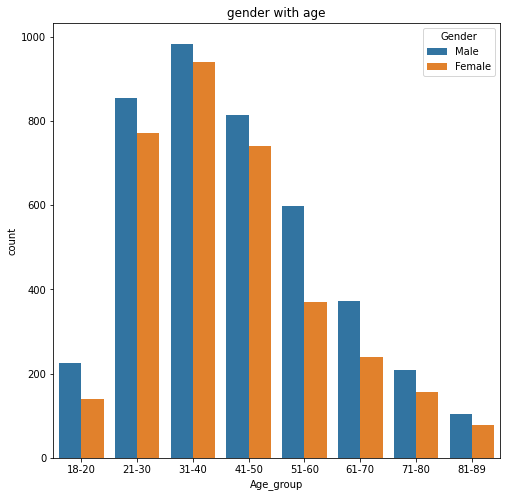

In [0]:
plt.figure(figsize=(8,8))
plt.title('gender with age')
sns.countplot(data=df_cleaned, x="Age_group", hue="Gender")

In [0]:
pivot_table=df_cleaned.pivot_table(index='career',columns='Segmentation',values='Work_Experience')
pivot_table=pivot_table.astype(int)
pivot_table

Segmentation,A,B,C,D
career,,,,
Artist,2,2,2,2
Doctor,2,1,2,2
Engineer,2,1,2,2
Entertainment,2,2,1,2
Executive,1,1,2,2
Healthcare,2,1,2,2
Homemaker,5,3,4,6
Lawyer,1,1,1,1
Marketing,2,1,2,2


In [0]:
df_cleaned.groupby(by=['ID']).count()

,Gender,marital status,Age,Graduated,career,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Age_group
ID,,,,,,,,,,,
458982,1,1,1,1,1,1,1,1,1,1,1
458983,1,1,1,1,1,1,1,1,1,1,1
458984,1,1,1,1,1,1,1,1,1,1,1
458985,1,1,1,1,1,1,1,1,1,1,1
458986,1,1,1,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
467969,1,1,1,1,1,1,1,1,1,1,1
467971,1,1,1,1,1,1,1,1,1,1,1
467972,1,1,1,1,1,1,1,1,1,1,1


In [0]:
df_cleaned.duplicated(['ID'])

Out[103]: 0       False
1       False
2       False
3       False
4       False
        ...  
8063    False
8064    False
8065    False
8066    False
8067    False
Length: 7720, dtype: bool

Out[105]: <AxesSubplot:xlabel='Gender', ylabel='count'>

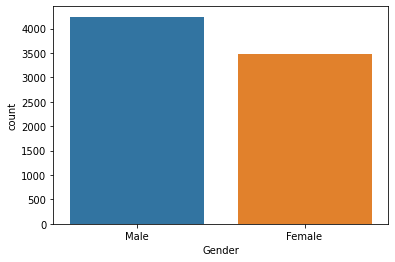

In [0]:
sns.countplot(data = df_cleaned, x='Gender')

Out[106]: <AxesSubplot:xlabel='Gender', ylabel='count'>

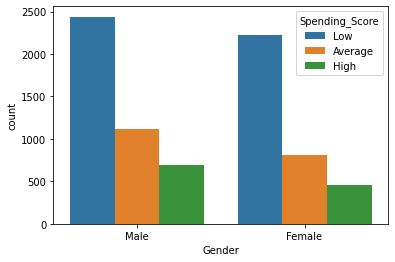

In [0]:
sns.countplot(data=df_cleaned,x='Gender',hue='Spending_Score')

Out[107]: <AxesSubplot:title={'center':'career and spending score'}, xlabel='career', ylabel='count'>

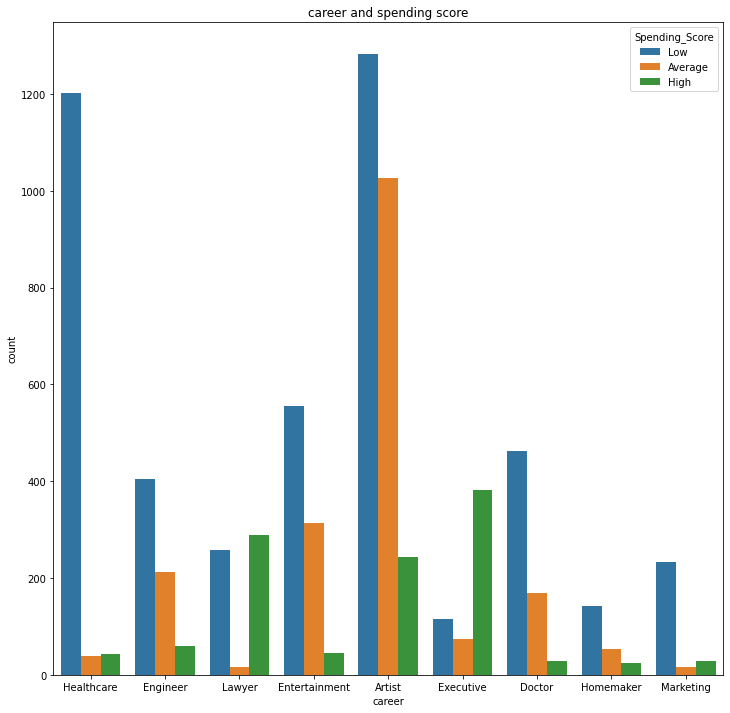

In [0]:
plt.figure(figsize=(12,12))
plt.title("career and spending score")
sns.countplot(data = df_cleaned, x='career', hue='Spending_Score')

Out[108]: <AxesSubplot:xlabel='Family_Size', ylabel='count'>

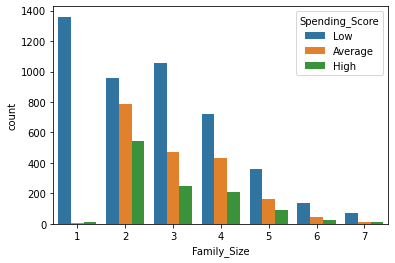

In [0]:
sns.countplot(data = df_cleaned, x='Family_Size', hue='Spending_Score')

In [0]:
df_cleaned['Gender']=df_cleaned['Gender'].map({'Male':1,'Female':0})

In [0]:
df_cleaned['marital status']=df_cleaned['marital status'].map({'Yes':1,'No':0})

In [0]:
df_cleaned['Graduated']=df_cleaned['Graduated'].map({'Yes':1,'No':0})

In [0]:
df_cleaned.head()

,ID,Gender,marital status,Age,Graduated,career,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Age_group
0,462809,1,0,22,0,Healthcare,1,Low,4,Cat_4,D,21-30
1,462643,0,1,38,1,Engineer,1,Average,3,Cat_4,A,31-40
2,466315,0,1,67,1,Engineer,1,Low,1,Cat_6,B,61-70
3,461735,1,1,67,1,Lawyer,0,High,2,Cat_6,B,61-70
4,462669,0,1,40,1,Entertainment,1,High,6,Cat_6,A,31-40


In [0]:
df_cleaned['Spending_Score']=df_cleaned['Spending_Score'].replace(['Low','Average','High'],[0,2,1])

In [0]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df_cleaned['Var_1']=enc.fit_transform(df_cleaned['Var_1'].astype('str'))

In [0]:
df_cleaned['career']=enc.fit_transform(df_cleaned['career'].astype('str'))

In [0]:
df_cleaned['Segmentation']=enc.fit_transform(df_cleaned['Segmentation'].astype('str'))

In [0]:
df_cleaned.head()

,ID,Gender,marital status,Age,Graduated,career,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Age_group
0,462809,1,0,22,0,5,1,0,4,3,3,21-30
1,462643,0,1,38,1,2,1,2,3,3,0,31-40
2,466315,0,1,67,1,2,1,0,1,5,1,61-70
3,461735,1,1,67,1,7,0,1,2,5,1,61-70
4,462669,0,1,40,1,3,1,1,6,5,0,31-40


In [0]:
df_cleaned.drop(['Age_group'],axis=1,inplace=True)
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
scale.fit_transform(df_cleaned)
df_cleaned=pd.DataFrame(df_cleaned,columns=['ID','Gender','marital status','Age','Graduated','career','Work_Experience','Spending_Score',
'Family_Size','Var_1','Segmentation'])

In [0]:
df_cleaned.head()

,ID,Gender,marital status,Age,Graduated,career,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,1,0,22,0,5,1,0,4,3,3
1,462643,0,1,38,1,2,1,2,3,3,0
2,466315,0,1,67,1,2,1,0,1,5,1
3,461735,1,1,67,1,7,0,1,2,5,1
4,462669,0,1,40,1,3,1,1,6,5,0


In [0]:
x=df_cleaned.iloc[:,:-1]
y=df_cleaned.iloc[:,-1]

In [0]:
x

,ID,Gender,marital status,Age,Graduated,career,Work_Experience,Spending_Score,Family_Size,Var_1
0,462809,1,0,22,0,5,1,0,4,3
1,462643,0,1,38,1,2,1,2,3,3
2,466315,0,1,67,1,2,1,0,1,5
3,461735,1,1,67,1,7,0,1,2,5
4,462669,0,1,40,1,3,1,1,6,5
...,...,...,...,...,...,...,...,...,...,...
8063,464018,1,0,22,0,0,0,0,7,0
8064,464685,1,0,35,0,4,3,0,4,3
8065,465406,0,0,33,1,5,1,0,1,5
8066,467299,0,0,27,1,5,1,0,4,5


In [0]:
y

Out[122]: 0       3
1       0
2       1
3       1
4       0
       ..
8063    3
8064    3
8065    3
8066    1
8067    1
Name: Segmentation, Length: 7720, dtype: int64

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

In [0]:
x_train.shape

Out[124]: (5404, 10)

In [0]:
y_train.shape

Out[125]: (5404,)

In [0]:
from sklearn.preprocessing import LabelEncoder
lbl=LabelEncoder()
encoded_y=lbl.fit_transform(y_train)
encoded_ytest=lbl.fit_transform(y_test)

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
import time
iris = load_iris()
start_time = time.time()
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(iris.data, iris.target)

Out[127]: KNeighborsClassifier(n_neighbors=3)

In [0]:
error_state=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,encoded_y)
    ypred=knn.predict(x_test)
    error_state.append(np.mean(ypred != encoded_ytest))

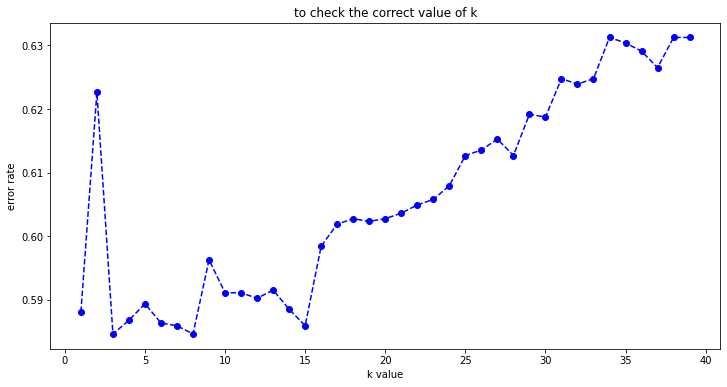

In [0]:
plt.figure(figsize=(12,6))
plt.plot(range(1,40),error_state,color='blue',linestyle='dashed',marker='o')
plt.xlabel("k value")
plt.ylabel("error rate")
plt.title("to check the correct value of k")
plt.show()

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [0]:
knn=KNeighborsClassifier(n_neighbors=15)
knn.fit(x_train,encoded_y)
yknn_predict=knn.predict(x_test)
knn_conf_matrix=confusion_matrix(yknn_predict,encoded_ytest)

In [0]:
knn_conf_matrix

Out[133]: array([[202, 135,  86, 150],
       [140, 151, 130,  86],
       [121, 154, 285,  79],
       [110,  86,  80, 321]])

In [0]:
knn_accuracy_score=accuracy_score(yknn_predict,encoded_ytest)

In [0]:
print(np.round(knn_accuracy_score*100,2),"%")

41.41 %


In [0]:
end_time = time.time()
run_time = end_time - start_time
print("Run time:", run_time, "seconds")

Run time: 315.9267599582672 seconds


In [0]:
    df_spark = spark.createDataFrame(df_cleaned)
    


In [0]:
type(df_spark)

Out[138]: pyspark.sql.dataframe.DataFrame

In [0]:
rdd3=df_spark.rdd

In [0]:
type(rdd3)

Out[140]: pyspark.rdd.RDD

In [0]:
rdd3.collect()

Out[141]: [Row(ID=462809, Gender=1, marital status=0, Age=22, Graduated=0, career=5, Work_Experience=1, Spending_Score=0, Family_Size=4, Var_1=3, Segmentation=3),
 Row(ID=462643, Gender=0, marital status=1, Age=38, Graduated=1, career=2, Work_Experience=1, Spending_Score=2, Family_Size=3, Var_1=3, Segmentation=0),
 Row(ID=466315, Gender=0, marital status=1, Age=67, Graduated=1, career=2, Work_Experience=1, Spending_Score=0, Family_Size=1, Var_1=5, Segmentation=1),
 Row(ID=461735, Gender=1, marital status=1, Age=67, Graduated=1, career=7, Work_Experience=0, Spending_Score=1, Family_Size=2, Var_1=5, Segmentation=1),
 Row(ID=462669, Gender=0, marital status=1, Age=40, Graduated=1, career=3, Work_Experience=1, Spending_Score=1, Family_Size=6, Var_1=5, Segmentation=0),
 Row(ID=461319, Gender=1, marital status=1, Age=56, Graduated=0, career=0, Work_Experience=0, Spending_Score=2, Family_Size=2, Var_1=5, Segmentation=2),
 Row(ID=460156, Gender=1, marital status=0, Age=32, Graduated=1, career=